- <b>Classification algorithms</b>

- <b>Submitted by Kaushik </b>
- <b>email- kumarkaushik1580@gmail.com</b>

## Self-Organizing Map (SOM)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ds = pd.read_csv("Dataset_II.csv")
ds1 = pd.read_csv("Dataset_II.csv")

In [3]:
ds.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


# Data preprocessing

In [4]:
ds.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [5]:
ds.drop(["Unnamed: 0","Purpose"],axis=1,inplace=True)
ds.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,67,male,2,own,NaN,little,1169,6
1,22,female,2,own,little,moderate,5951,48
2,49,male,1,own,little,NaN,2096,12
3,45,male,2,free,little,little,7882,42
4,53,male,2,free,little,little,4870,24


In [6]:
ds_null=ds.columns[ds.isnull().any()]
ds[ds_null].isnull().sum()

Saving accounts     183
Checking account    394
dtype: int64

ds["Saving accounts"].fillna(ds["Saving accounts"].mean(), inplace=True)
ds["Checking account"].fillna(ds["Checking account"].mean(), inplace=True)

In [7]:
ds["Saving accounts"].fillna(method='bfill',inplace=True)
ds["Checking account"].fillna(method='ffill',inplace=True)

In [8]:
ds.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
dtype: int64

In [9]:
ds.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,67,male,2,own,little,little,1169,6
1,22,female,2,own,little,moderate,5951,48
2,49,male,1,own,little,moderate,2096,12
3,45,male,2,free,little,little,7882,42
4,53,male,2,free,little,little,4870,24


In [10]:
ds.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
dtype: object

In [11]:
ds_categ = list(ds.select_dtypes(exclude = ["number"]).columns)
ds_categ

['Sex', 'Housing', 'Saving accounts', 'Checking account']

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ds_categ:
    print(ds[i].unique())
    ds[i] = le.fit_transform(ds[i])

['male' 'female']
['own' 'free' 'rent']
['little' 'quite rich' 'rich' 'moderate']
['little' 'moderate' 'rich']


In [13]:
ds.head(20)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,67,1,2,1,0,0,1169,6
1,22,0,2,1,0,1,5951,48
2,49,1,1,1,0,1,2096,12
3,45,1,2,0,0,0,7882,42
4,53,1,2,0,0,0,4870,24
5,35,1,1,0,2,0,9055,36
6,53,1,2,1,2,0,2835,24
7,35,1,3,2,0,1,6948,36
8,61,1,1,1,3,1,3059,12
9,28,1,3,1,0,1,5234,30


ds_copy = ds.copy()

ds_copy.head()

In [14]:
ds.tail()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
995,31,0,1,1,0,0,1736,12
996,40,1,3,1,0,0,3857,30
997,38,1,2,1,0,0,804,12
998,23,1,2,0,0,0,1845,45
999,27,1,2,1,1,1,4576,45


In [15]:
ds.dtypes

Age                 int64
Sex                 int32
Job                 int64
Housing             int32
Saving accounts     int32
Checking account    int32
Credit amount       int64
Duration            int64
dtype: object

In [16]:
X=ds.iloc[:, :].values
y= np.genfromtxt('Dataset_II.csv', delimiter=',', usecols=(9), dtype=str)
t = np.zeros(len(y), dtype=int)
t[y == 'radio/TV'] = 0
t[y == 'education'] = 1
t[y == 'furniture/equipment'] = 2
t[y == 'car'] = 3
t[y == 'business'] = 4
t[y == 'repairs'] = 5
t[y == 'vacation/others'] = 6
t[y == 'domestics appliances'] = 7



In [17]:
# featureScaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)


In [18]:
# Training SOM
from minisom import MiniSom

In [19]:
som=MiniSom(x=10,y=10,input_len=8,sigma=1.0,learning_rate=0.5)

In [20]:
som.random_weights_init(X)

In [21]:
som.train_random(data=X,num_iteration=100)

In [22]:
# Visulazing the result
from pylab import bone, pcolor,colorbar,plot,show

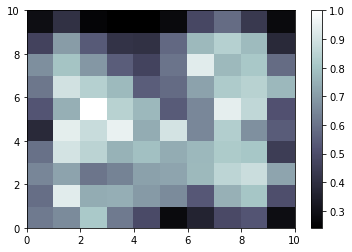

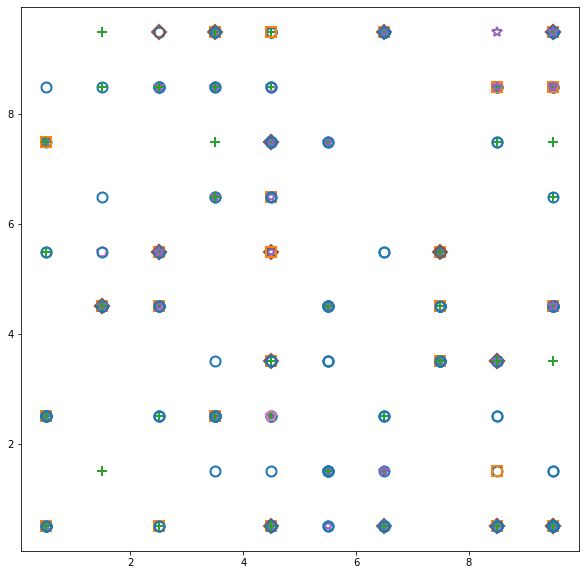

In [23]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers=['o','s','+','-','*','D','p','-s']
colors=['C0','C1','C2','C3','C4','C5','C6','C7']
plt.figure(figsize=(10, 10))


for i,x in enumerate(X):
    w=som.winner(x)
    plot(w[0]+0.5,
         w[1]+0.5,
        markers[t[i]],
        markeredgecolor=colors[t[i]],markerfacecolor='None',markersize=10,markeredgewidth=2)
show()
plt.show()

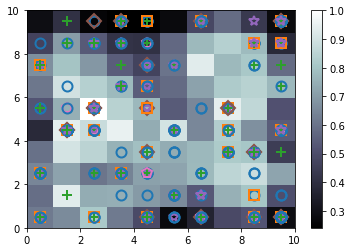

In [24]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers=['o','s','+','-','*','D','p','-s']
colors=['C0','C1','C2','C3','C4','C5','C6','C7']

for i,x in enumerate(X):
    w=som.winner(x)
    plot(w[0]+0.5,
         w[1]+0.5,
        markers[t[i]],
        markeredgecolor=colors[t[i]],markerfacecolor='None',markersize=10,markeredgewidth=2)
show()



In [25]:
print("Training...")
som.train_batch(X, 1000, verbose=True)  # random training
print("\n...ready!")

Training...


 [  967 / 1000 ]  97% - 0:00:00 left 

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.287157071481242

...ready!


- A self-organizing map (SOM) is a type of artificial neural network (ANN) that is trained using unsupervised learning to produce a low-dimensional (typically two-dimensional), discretized representation of the input space of the training samples, called a map, and is therefore a method to do dimensionality reduction.
- With the help SOM, different cluster is created and according to the cluster the types of loan a cluster can have.
    - 'radio/TV' = 0 ---->'o'-->'C0'
    - education' = 1 --->'s'-->'C1'
    - 'furniture/equipment'= 2 ---->'+'-->'C2'
    - 'car' = 3 ---->'-'-->'C3'
    - 'business' = 4---->'*'-->'C4'
    - 'repairs' = 5---->'D'-->'C5'
    - 'vacation/others' = 6---->'p'-->'C6'
    - 'domestics appliances' = 7---->'-s'-->'C7'

- Some cluster can take no.of loans eg- a cluster can take radio/TV,education,car etc.

In [26]:
label = np.genfromtxt('Dataset_II.csv', delimiter=',', usecols=(9), dtype=str)

In [27]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

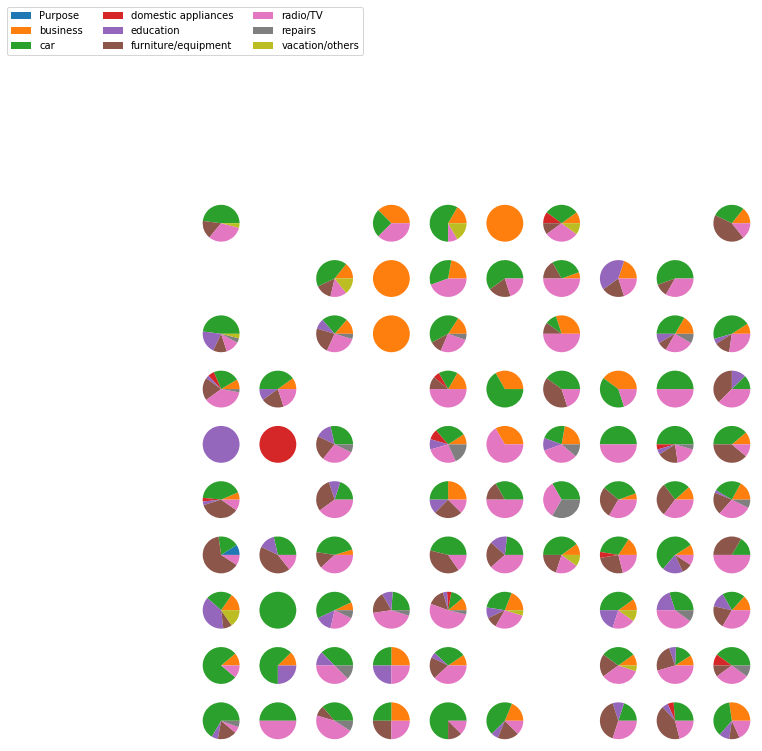

In [29]:
X=np.genfromtxt('data.csv', delimiter=',', usecols=(1, 2, 3, 4, 5, 6, 7, 8))
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)

label = np.genfromtxt('Dataset_II.csv', delimiter=',', usecols=(9), dtype=str)
labels_map = som.labels_map(X, label)
label_names = np.unique(label)
plt.figure(figsize=(10, 10))
the_grid = gridspec.GridSpec(10, 10)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[6-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names, bbox_to_anchor=(0., 6.5), ncol=3)
plt.show()